In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
from scipy.stats import skew

In [13]:
df=pd.read_csv('train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [14]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [17]:
df.shape

(2000, 21)

In [18]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

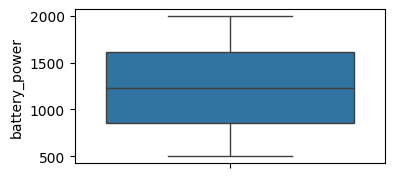

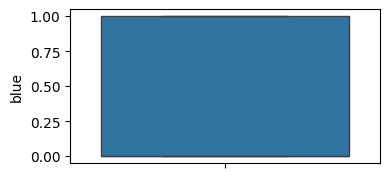

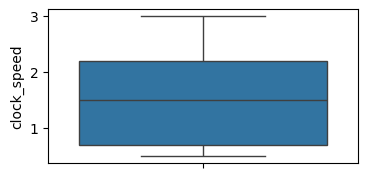

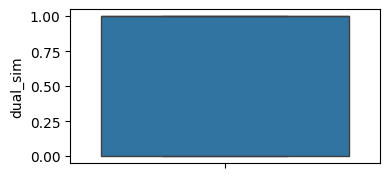

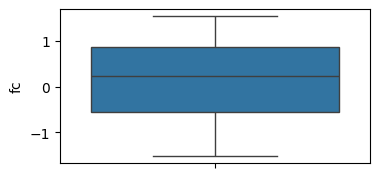

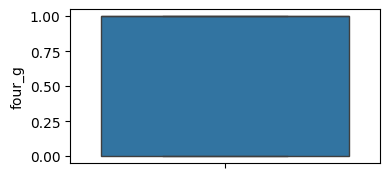

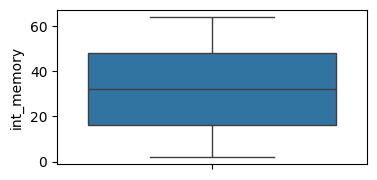

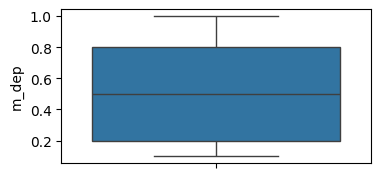

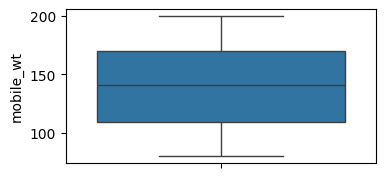

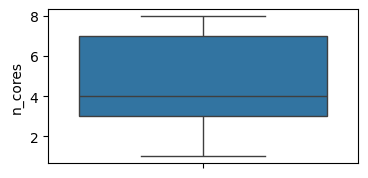

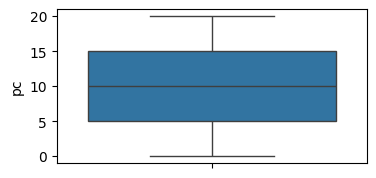

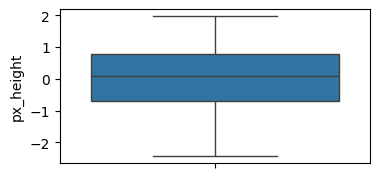

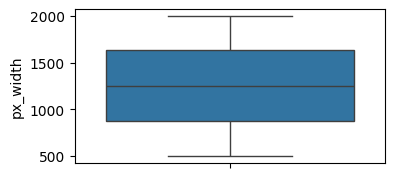

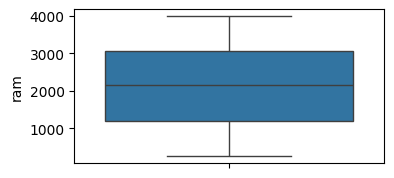

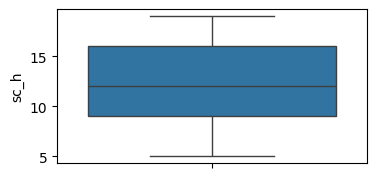

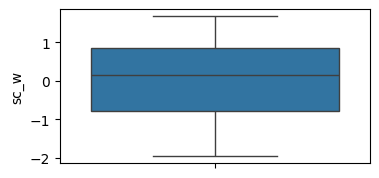

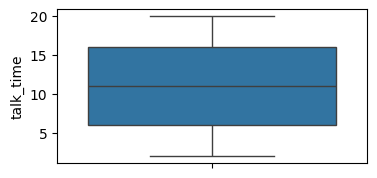

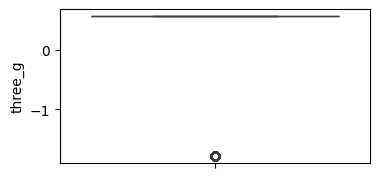

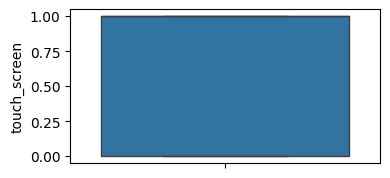

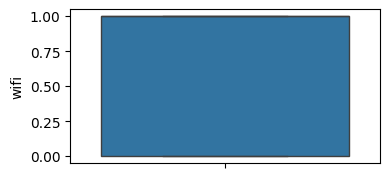

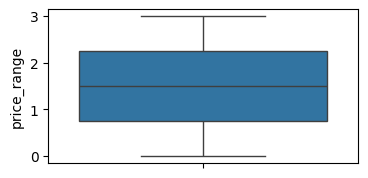

In [51]:
plt.figure(figsize=(4,2))
sns.boxplot(df['battery_power'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['blue'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['clock_speed'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['dual_sim'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['fc'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['four_g'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['int_memory'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['m_dep'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['mobile_wt'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['n_cores'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['pc'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['px_height'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['px_width'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['ram'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['sc_h'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['sc_w'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['talk_time'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['three_g'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['touch_screen'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['wifi'])
plt.show()

plt.figure(figsize=(4,2))
sns.boxplot(df['price_range'])
plt.show()

In [53]:
from scipy.stats import skew
skewness_values=df.apply(skew)

print(skewness_values)

battery_power    0.031875
blue             0.020001
clock_speed      0.177951
dual_sim        -0.038007
fc              -0.401847
four_g          -0.086080
int_memory       0.057846
m_dep            0.089015
mobile_wt        0.006553
n_cores          0.003625
pc               0.017293
px_height       -0.288382
px_width         0.014776
ram              0.006623
sc_h            -0.098810
sc_w            -0.455645
talk_time        0.009505
three_g         -1.227220
touch_screen    -0.012000
wifi            -0.028003
price_range      0.000000
dtype: float64


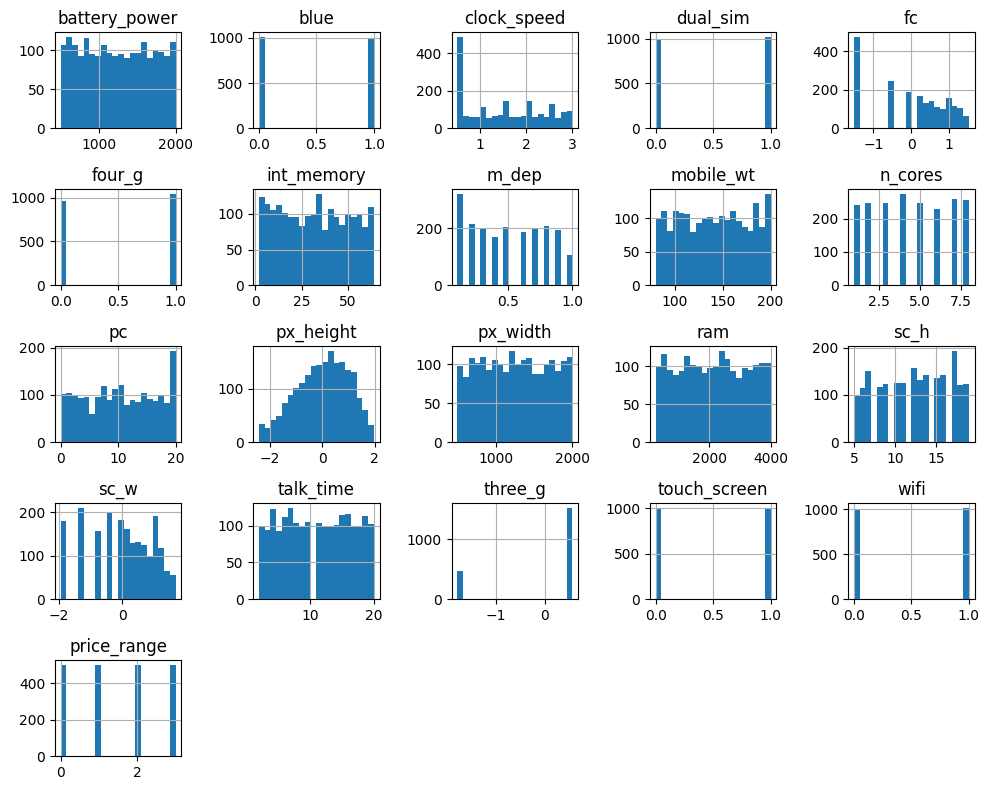

In [56]:
df.hist(bins=20,figsize=(10,8))
plt.tight_layout()
plt.show()

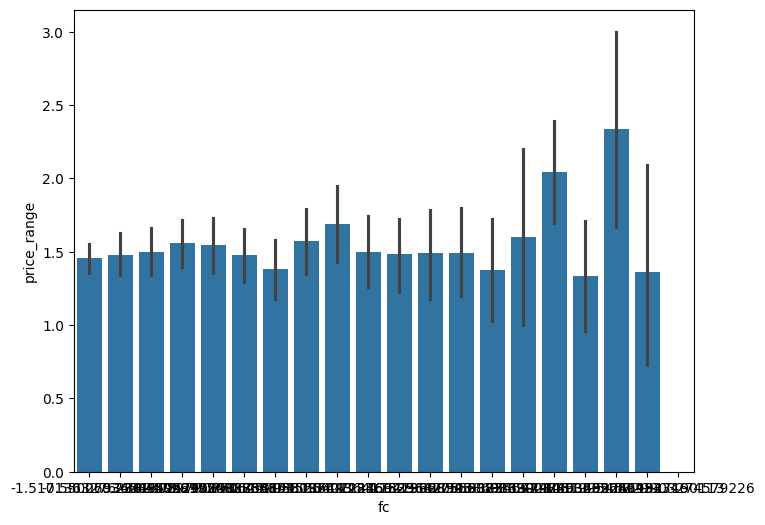

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['fc'],y=df['price_range'])
plt.show()

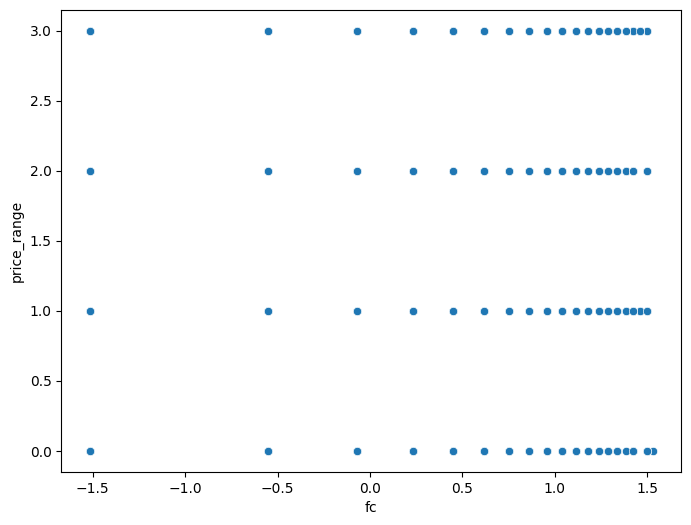

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['fc'],y=df['price_range'])
plt.show()

<Axes: >

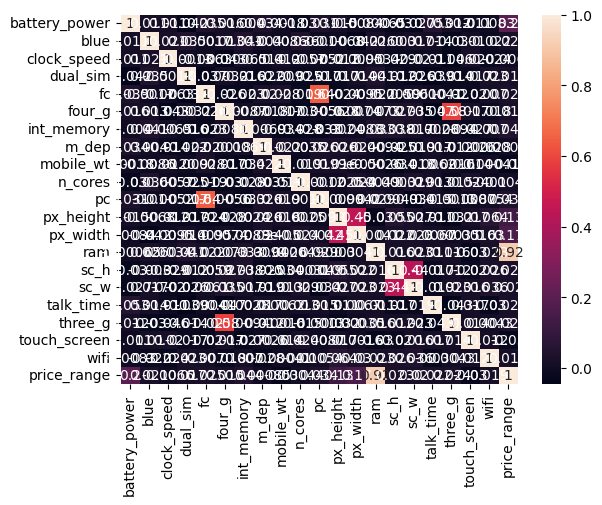

In [64]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)

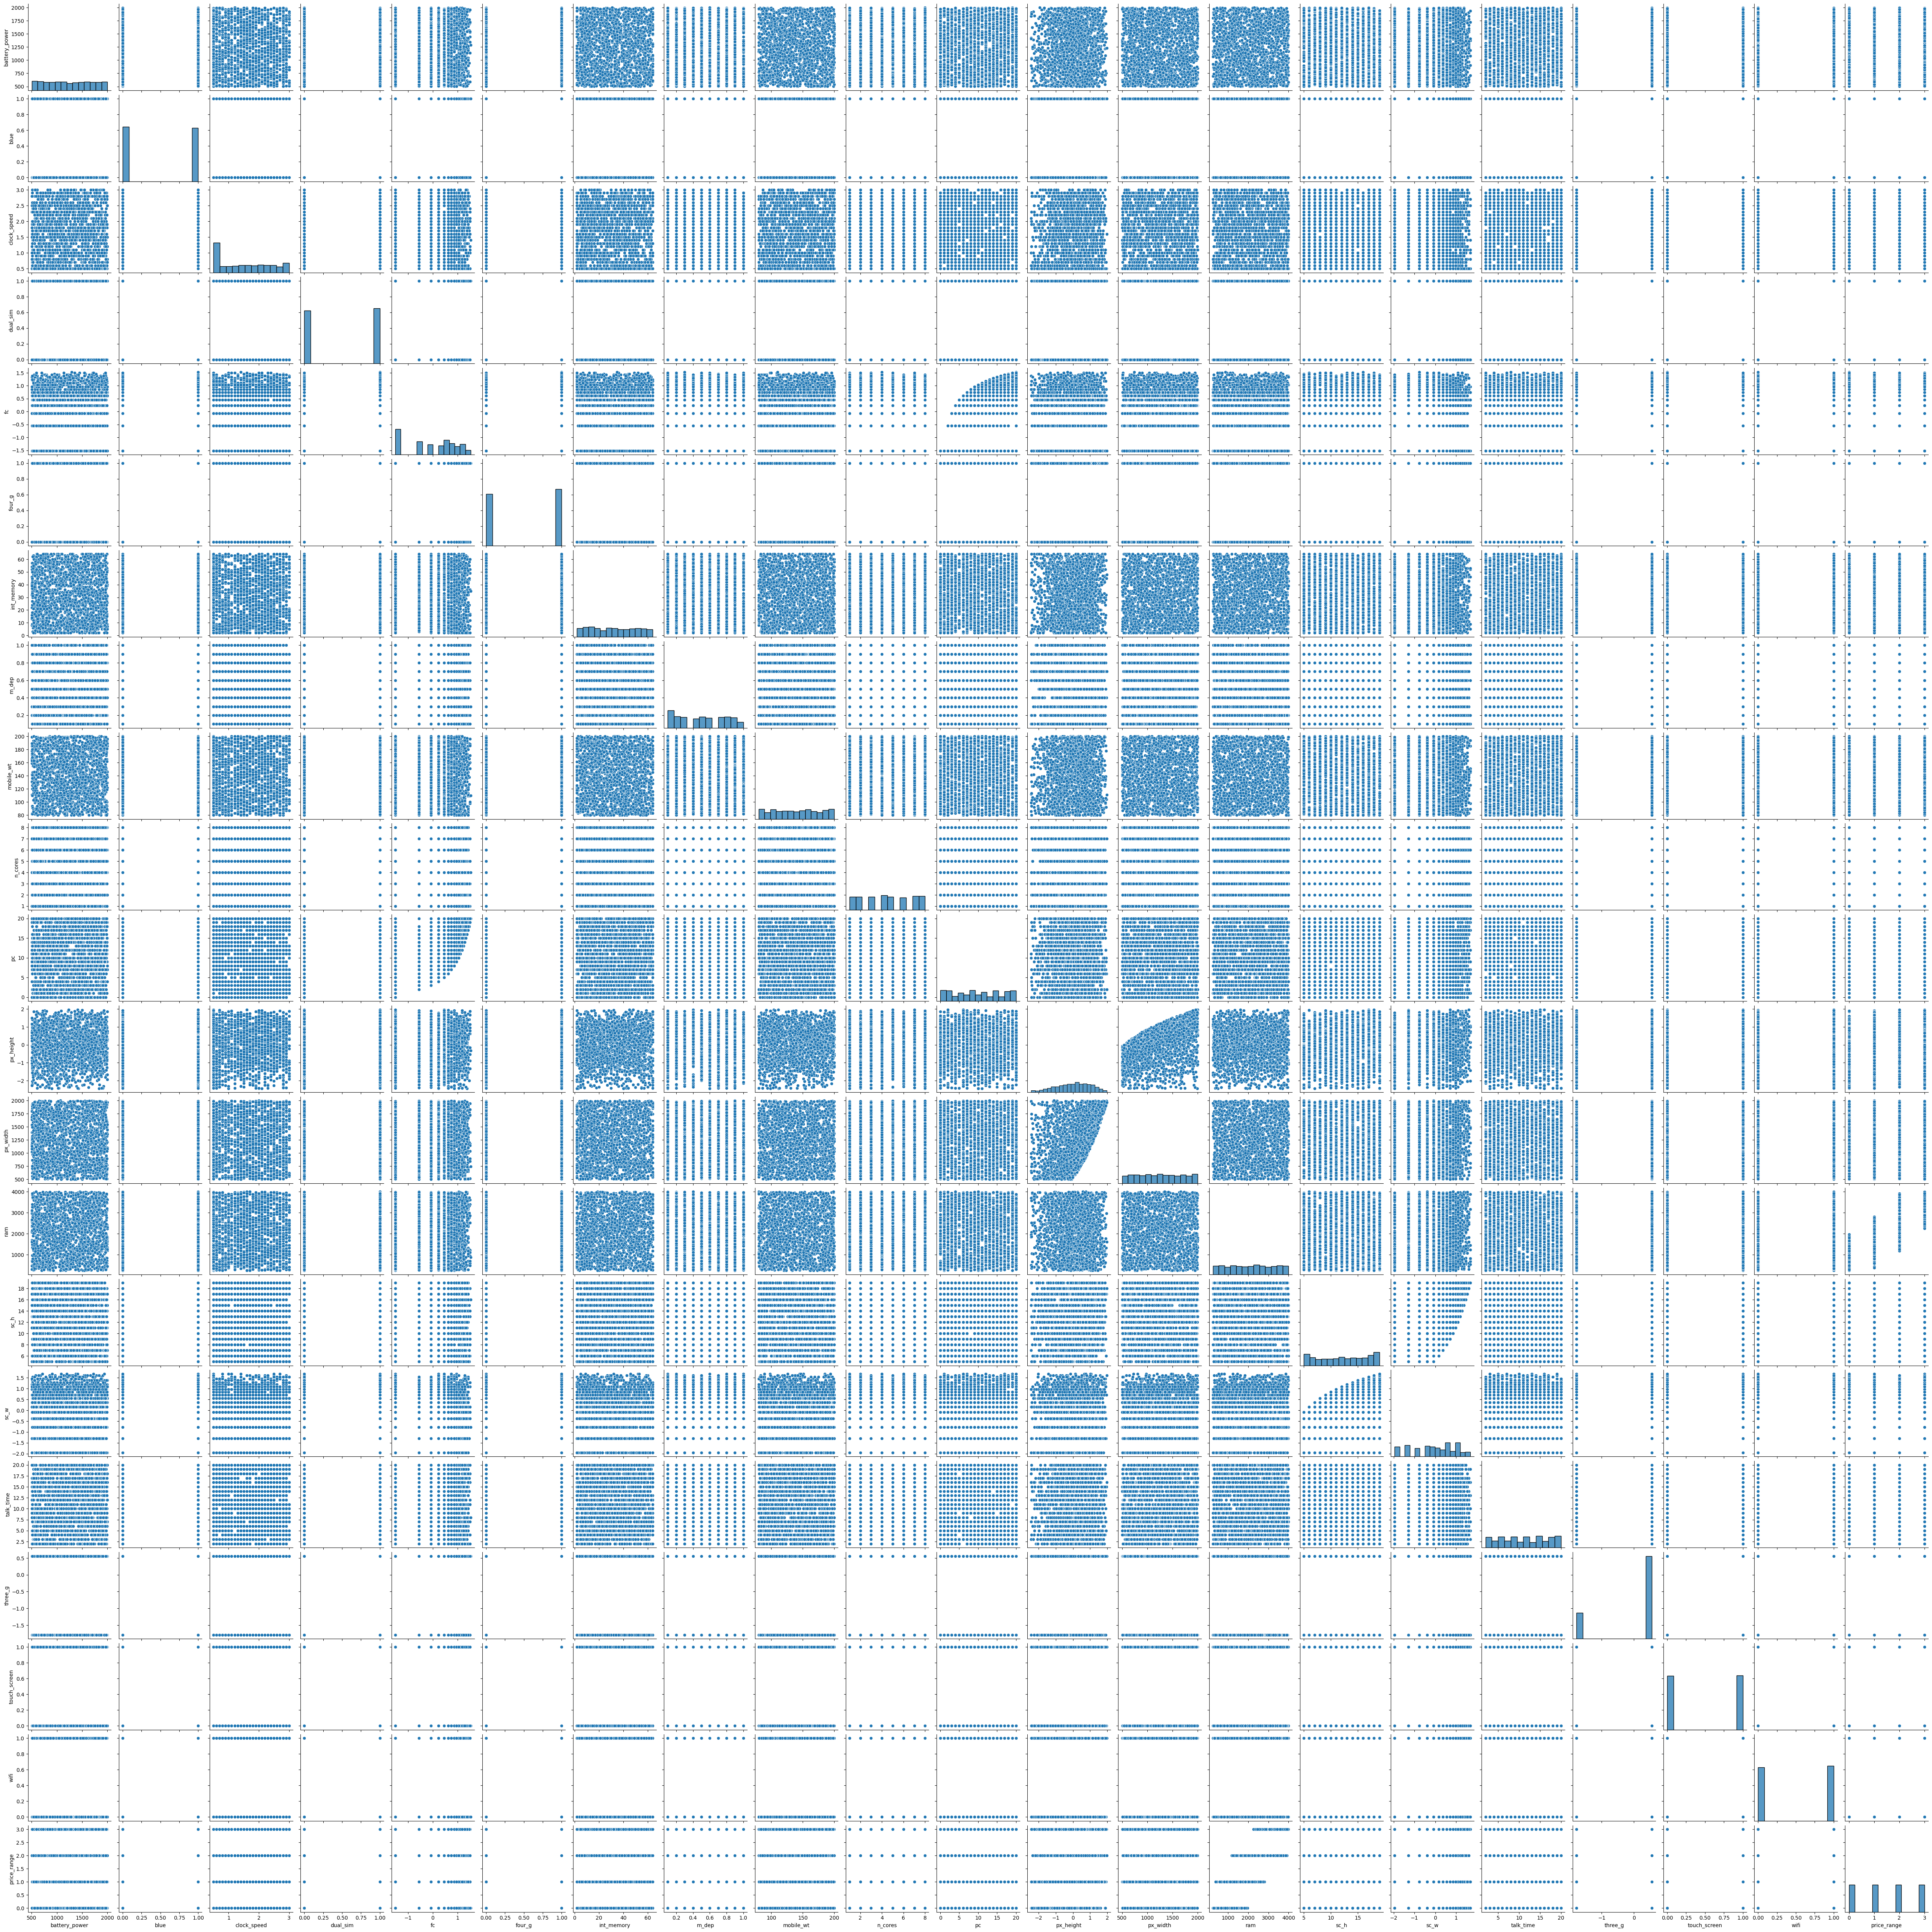

In [66]:
sns.pairplot(df)

In [67]:
df.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0            842     0          2.2         0 -0.550275       0           7   
1           1021     1          0.5         1 -1.517136       1          53   
2            563     1          0.5         1 -0.069360       1          41   
3            615     1          2.5         0 -1.517136       0          10   
4           1821     1          1.2         0  1.289939       1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h      sc_w  \
0    0.6        188        2  ...  -2.248218       756  2549     9  0.549539   
1    0.7        136        3  ...   0.724800      1988  2631    17 -0.387622   
2    0.9        145        5  ...   1.233487      1716  2603    11 -0.773442   
3    0.8        131        6  ...   1.173350      1786  2769    16  0.706759   
4    0.6        141        2  ...   1.162943      1212  1411     8 -0.773442   

   talk_time   three_g  touch_screen  wifi  price_range  
0         19 -1.786861             0     1            1  
1          7  0.559641             1     0            2  
2          9  0.559641             1     0            2  
3         11  0.559641             0     0            2  
4         15  0.559641             1     0            1  

[5 rows x 21 columns]

In [69]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df_scaled=df.copy()
df_scaled[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g']]=scaler.fit_transform(df_scaled[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g']])
df_scaled.head()

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0      -0.902597     0     0.830779         0 -0.550275       0   -1.380644   
1      -0.495139     1    -1.253064         1 -1.517136       1    1.155024   
2      -1.537686     1    -1.253064         1 -0.069360       1    0.493546   
3      -1.419319     1     1.198517         0 -1.517136       0   -1.215274   
4       1.325906     1    -0.395011         0  1.289939       1    0.658915   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.340740   1.349249 -1.101971  ...  -2.248218 -1.146784  0.391703   
1  0.687548  -0.120059 -0.664768  ...   0.724800  1.704465  0.467317   
2  1.381165   0.134244  0.209639  ...   1.233487  1.074968  0.441498   
3  1.034357  -0.261339  0.646842  ...   1.173350  1.236971  0.594569   
4  0.340740   0.021220 -1.101971  ...   1.162943 -0.091452 -0.657666   

       sc_h      sc_w  talk_time   three_g  touch_screen  wifi  price_range  
0 -0.784983  0.549539   1.462493 -1.786861             0     1            1  
1  1.114266 -0.387622  -0.734267  0.559641             1     0            2  
2 -0.310171 -0.773442  -0.368140  0.559641             1     0            2  
3  0.876859  0.706759  -0.002014  0.559641             0     0            2  
4 -1.022389 -0.773442   0.730240  0.559641             1     0            1  

[5 rows x 21 columns]

In [70]:
from sklearn.model_selection import train_test_split

x=df_scaled[['battery_power','blue','dual_sim','four_g','touch_screen','wifi','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g']]
y=df['price_range']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.69817893 0.04176102]


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred1=lr.predict(X_test)

r2=r2_score(y_test,y_pred1)
mse=mean_squared_error(y_test,y_pred1)
mae=mean_absolute_error(y_test,y_pred1)
rmse=root_mean_squared_error(y_test,y_pred1)

coeficient=lr.coef_
intercept=lr.intercept_

print('r2:',r2)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('coefficient:',coeficient)
print('intercept:',intercept)

r2: 0.921545505380028
mse: 0.10467741910610621
mae: 0.2677415535343698
rmse: 0.3235388989072353
coefficient: [ 2.26453112e-01  7.39043147e-03 -2.63318192e-02 -1.31280929e-02
  4.78561548e-03 -1.19697750e-02 -9.28910800e-03 -1.42258149e-03
  1.43383666e-02 -5.72296309e-03 -3.56114718e-02  3.82515116e-03
  1.11742703e-01  1.28943010e-01  1.02552071e+00  4.36515206e-03
 -6.36747688e-04  6.16067351e-04  1.11346771e-02]
intercept: 1.521299869673553


In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

dt=DecisionTreeRegressor(max_depth=None,max_features=None,random_state=42,max_leaf_nodes=4)
dt.fit(X_train,y_train)

y_pred2=dt.predict(X_test)

r2=r2_score(y_test,y_pred2)
mse=mean_squared_error(y_test,y_pred2)
mae=mean_absolute_error(y_test,y_pred2)
rmse=root_mean_squared_error(y_test,y_pred2)

coeficient=lr.coef_
intercept=lr.intercept_

print('r2:',r2)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('coefficient:',coeficient)
print('intercept:',intercept)

r2: 0.8255708659579206
mse: 0.2327309819135567
mae: 0.3247655593409152
rmse: 0.48242199567759836
coefficient: [ 2.26453112e-01  7.39043147e-03 -2.63318192e-02 -1.31280929e-02
  4.78561548e-03 -1.19697750e-02 -9.28910800e-03 -1.42258149e-03
  1.43383666e-02 -5.72296309e-03 -3.56114718e-02  3.82515116e-03
  1.11742703e-01  1.28943010e-01  1.02552071e+00  4.36515206e-03
 -6.36747688e-04  6.16067351e-04  1.11346771e-02]
intercept: 1.521299869673553


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

rf=RandomForestRegressor(random_state=42,max_depth=None,max_features=None)
rf.fit(X_train,y_train)

y_pred3=rf.predict(X_test)

r2=r2_score(y_test,y_pred3)
mse=mean_squared_error(y_test,y_pred3)
mae=mean_absolute_error(y_test,y_pred3)
rmse=root_mean_squared_error(y_test,y_pred3)

coeficient=lr.coef_
intercept=lr.intercept_

print('r2:',r2)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('coefficient:',coeficient)
print('intercept:',intercept)

r2: 0.9461700682502728
mse: 0.07182225
mae: 0.16252499999999998
rmse: 0.2679967350547391
coefficient: [ 2.26453112e-01  7.39043147e-03 -2.63318192e-02 -1.31280929e-02
  4.78561548e-03 -1.19697750e-02 -9.28910800e-03 -1.42258149e-03
  1.43383666e-02 -5.72296309e-03 -3.56114718e-02  3.82515116e-03
  1.11742703e-01  1.28943010e-01  1.02552071e+00  4.36515206e-03
 -6.36747688e-04  6.16067351e-04  1.11346771e-02]
intercept: 1.521299869673553


In [87]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

ab=AdaBoostRegressor(random_state=42,learning_rate=0.2,n_estimators=5)
ab.fit(X_train,y_train)

y_pred4=ab.predict(X_test)

r2=r2_score(y_test,y_pred4)
mse=mean_squared_error(y_test,y_pred4)
mae=mean_absolute_error(y_test,y_pred4)
rmse=root_mean_squared_error(y_test,y_pred4)

coeficient=lr.coef_
intercept=lr.intercept_

print('r2:',r2)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('coefficient:',coeficient)
print('intercept:',intercept)

r2: 0.8785174617163963
mse: 0.1620873174390339
mae: 0.29156088838867705
rmse: 0.4026006922982546
coefficient: [ 2.26453112e-01  7.39043147e-03 -2.63318192e-02 -1.31280929e-02
  4.78561548e-03 -1.19697750e-02 -9.28910800e-03 -1.42258149e-03
  1.43383666e-02 -5.72296309e-03 -3.56114718e-02  3.82515116e-03
  1.11742703e-01  1.28943010e-01  1.02552071e+00  4.36515206e-03
 -6.36747688e-04  6.16067351e-04  1.11346771e-02]
intercept: 1.521299869673553


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

gb=GradientBoostingRegressor(random_state=42,learning_rate=0.2,n_estimators=5)
gb.fit(X_train,y_train)

y_pred5=gb.predict(X_test)

r2=r2_score(y_test,y_pred5)
mse=mean_squared_error(y_test,y_pred5)
mae=mean_absolute_error(y_test,y_pred5)
rmse=root_mean_squared_error(y_test,y_pred5)

coeficient=lr.coef_
intercept=lr.intercept_

print('r2:',r2)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)
print('coefficient:',coeficient)
print('intercept:',intercept)

r2: 0.7848408922052615
mse: 0.287074694830706
mae: 0.4717903283227334
rmse: 0.5357935188397729
coefficient: [ 2.26453112e-01  7.39043147e-03 -2.63318192e-02 -1.31280929e-02
  4.78561548e-03 -1.19697750e-02 -9.28910800e-03 -1.42258149e-03
  1.43383666e-02 -5.72296309e-03 -3.56114718e-02  3.82515116e-03
  1.11742703e-01  1.28943010e-01  1.02552071e+00  4.36515206e-03
 -6.36747688e-04  6.16067351e-04  1.11346771e-02]
intercept: 1.521299869673553
